# Capstone - EDA

Some EDA will be completed, using the previously cleaned London Airbnb dataset.

The main goal of this EDA will be to better understand the signficance of various columns, identify initial trends and correlations and gain some first insights into the functions of the London Airbnb rental market.

Particular attention at this stage will be given to the numerical columns, and their relation to the target column, and each other. 

In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import cleaned dataset:
airbnb_ldn = pd.read_csv('data/airbnb_ldn_clean.csv')

In [3]:
airbnb_ldn.shape

(32674, 37)

In [4]:
# drop 'Unnamed', column added due to additional index column being added with the import of the cleaned data:
airbnb_ldn.drop(columns = 'Unnamed: 0', inplace=True)

In [5]:
airbnb_ldn.columns

Index(['Listing Title', 'Property Type', 'Listing Type', 'City', 'Zipcode',
       'Number of Reviews', 'Bedrooms', 'Bathrooms', 'Max Guests',
       'Airbnb Superhost', 'Cancellation Policy', 'Cleaning Fee (Native)',
       'Extra People Fee(Native)', 'Check-in Time', 'Checkout Time',
       'Minimum Stay', 'Latitude', 'Longitude', 'Overall Rating',
       'Airbnb Communication Rating', 'Airbnb Accuracy Rating',
       'Airbnb Checkin Rating', 'Airbnb Location Rating',
       'Airbnb Value Rating', 'Amenities', 'Airbnb Host ID', 'guest_controls',
       'Pets Allowed', 'Count Available Days LTM', 'Count Blocked Days LTM',
       'Count Reservation Days LTM', 'Occupancy Rate LTM',
       'Number of Bookings LTM',
       'Number of Bookings LTM - Number of observed month',
       'Average Daily Rate (Native)', 'Annual Revenue LTM (Native)'],
      dtype='object')

The columns will be split between numerical, categorical and target variables:

In [6]:
# split the dataframe into numerical columns, categorical columns and the target column:
X_num_cols = (airbnb_ldn.select_dtypes(include=['int', 'float64'])).drop(columns='Annual Revenue LTM (Native)')
X_cat_cols = airbnb_ldn.select_dtypes(include='object')
y = airbnb_ldn['Annual Revenue LTM (Native)']

Now the columns have been split into their relevant subsets, the appropriate EDA techniques can be applied. 

Starting with looking at the numerical columns. Histograms for each column will be created, to gain an idea of the range of values, distributions and general trends.

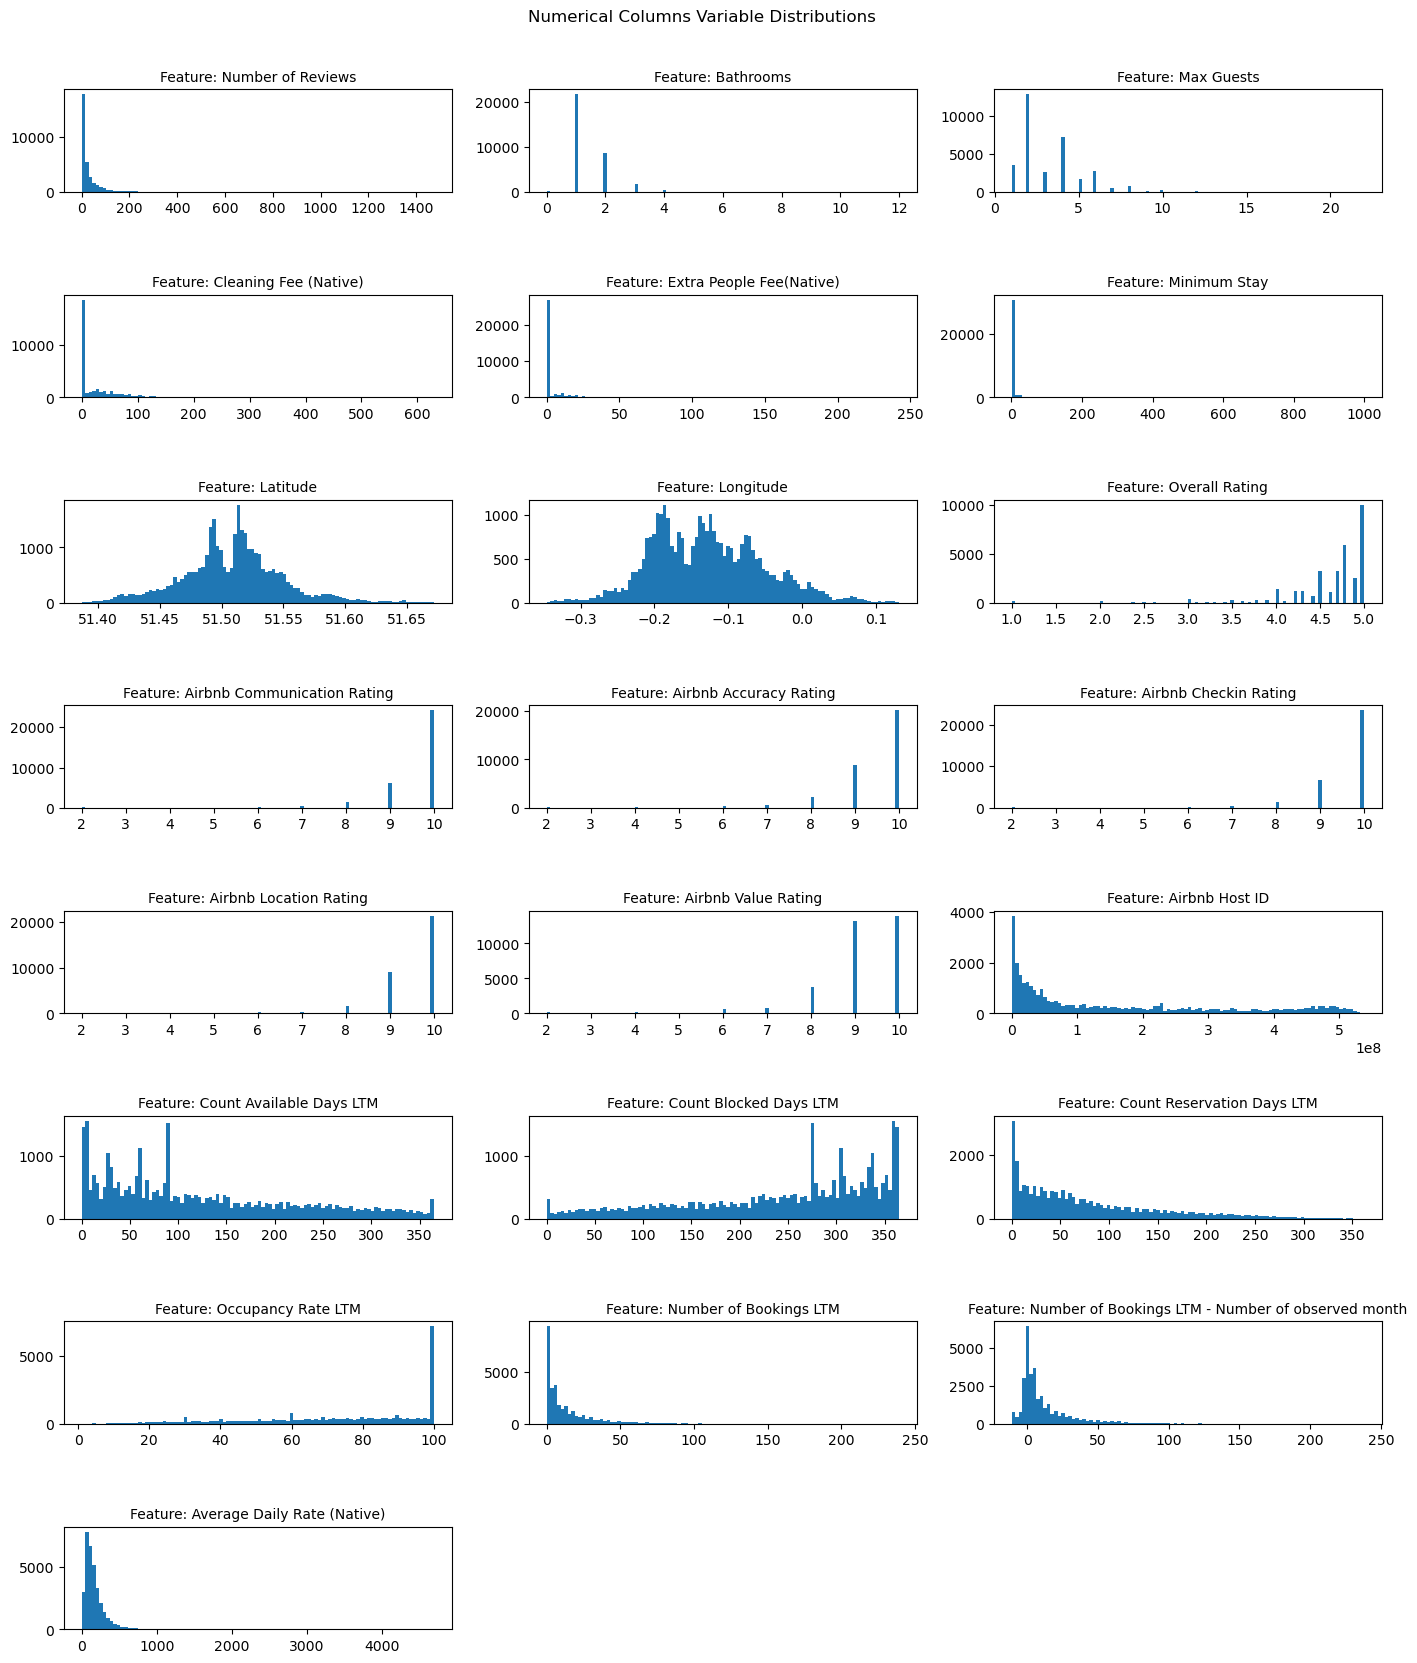

In [7]:
# create a subplots structure with 3 columns and 8 rows
cols = 3
rows = len(X_num_cols.columns)//cols + 1

plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Numerical Columns Variable Distributions', y=0.92)

for i, column in enumerate(X_num_cols.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(X_num_cols[column], bins=100)


plt.show()

There is a substantial variation in the scale and distribution of the different numerical columns. The different numerical columns can be somewhat grouped, as different columns share similar characteristics:

Group 1 - Property Features:
- Bathrooms 
- Max Guests (there is no 'number of bedrooms' column, hence the Max guests will be the column to indicate property size)

Group 2 - Location:
- Longitude
- Latitude

Group 3 - Booking Related:
- Cleaning Fee (Native)
- Extra people fee (Native)
- Minimum Stay 
- Count Available Days LTM
- Count Blocked Days LTM
- Count Reservation Days LTM
- Occupancy Rate LTM
- Number of Bookings LTM
- Number of Bookings LTM - Number of observed month
- Average Daily Rate (Native)

 
Group 4 - Reviews:
- Number of Reviews
- Airbnb Communication Rating
- Airbnb Accuracy Rating
- Airbnb Cleanliness Rating
- Airbnb Checkin Rating
- Airbnb Location Rating
- Airbnb Value Rating
- Overall Rating

Group 5 - Host Related:
- Airbnb Host ID
- Host Listing Count

All the numerical columns can be log transformed, to improve their distribution:

In [8]:
# log transform the numerical columns, adding one so that the log of zero isn't taken
X_log = np.log(X_num_cols + 1)

C:\Users\blcm9\anaconda3\envs\capstone\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
C:\Users\blcm9\anaconda3\envs\capstone\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


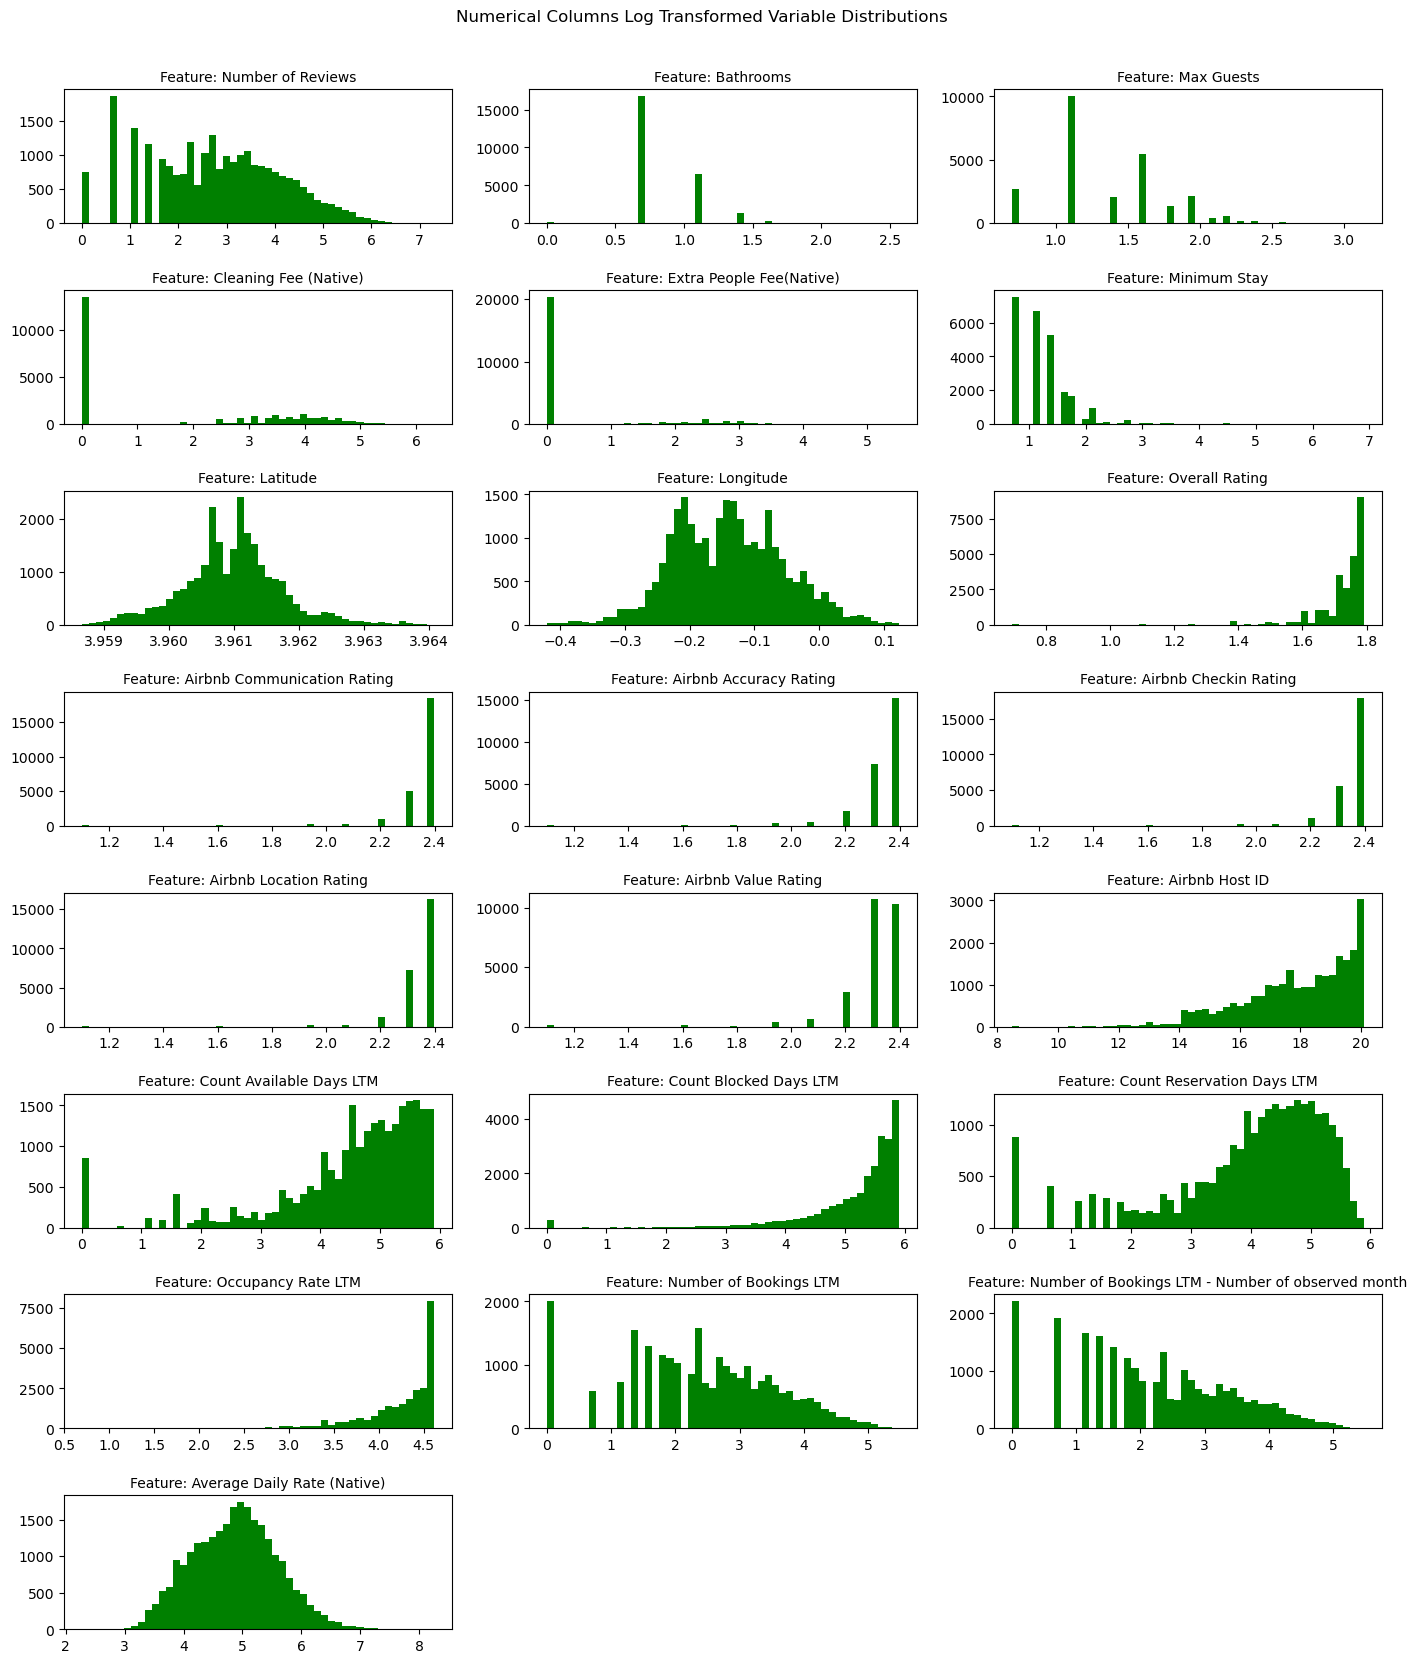

In [9]:
# Filter out infinite or non-finite values
X_log_finite = X_log.replace([np.inf, -np.inf], np.nan).dropna()

# Calculate the number of rows and columns for the subplots
cols = 3
rows = len(X_log_finite.columns) // cols + 1

# Create the subplots
plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Numerical Columns Log Transformed Variable Distributions', y=0.92)

# Plot histograms for each column
for i, column in enumerate(X_log_finite.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(X_log_finite[column], bins=50, color='green')

plt.show()

The subplots produced above show how several of the previously skewed histograms now show a more normally distributed pattern. This will be beneficial going forward into the modelling phase.

Box plots can be produced for a selection of continuous numeric variables. These are:
- Number of reviews
- Bathrooms
- Max Guests
- Overall Rating
- Location Rating
- Count Available Days LTM
- Occupancy Rate LTM
- Average Daily Rate (Native)

In [10]:
boxplot_df = X_num_cols[['Number of Reviews', 'Bathrooms', 'Max Guests', 'Overall Rating', 'Airbnb Location Rating', 'Count Available Days LTM', 'Occupancy Rate LTM', 'Average Daily Rate (Native)']]

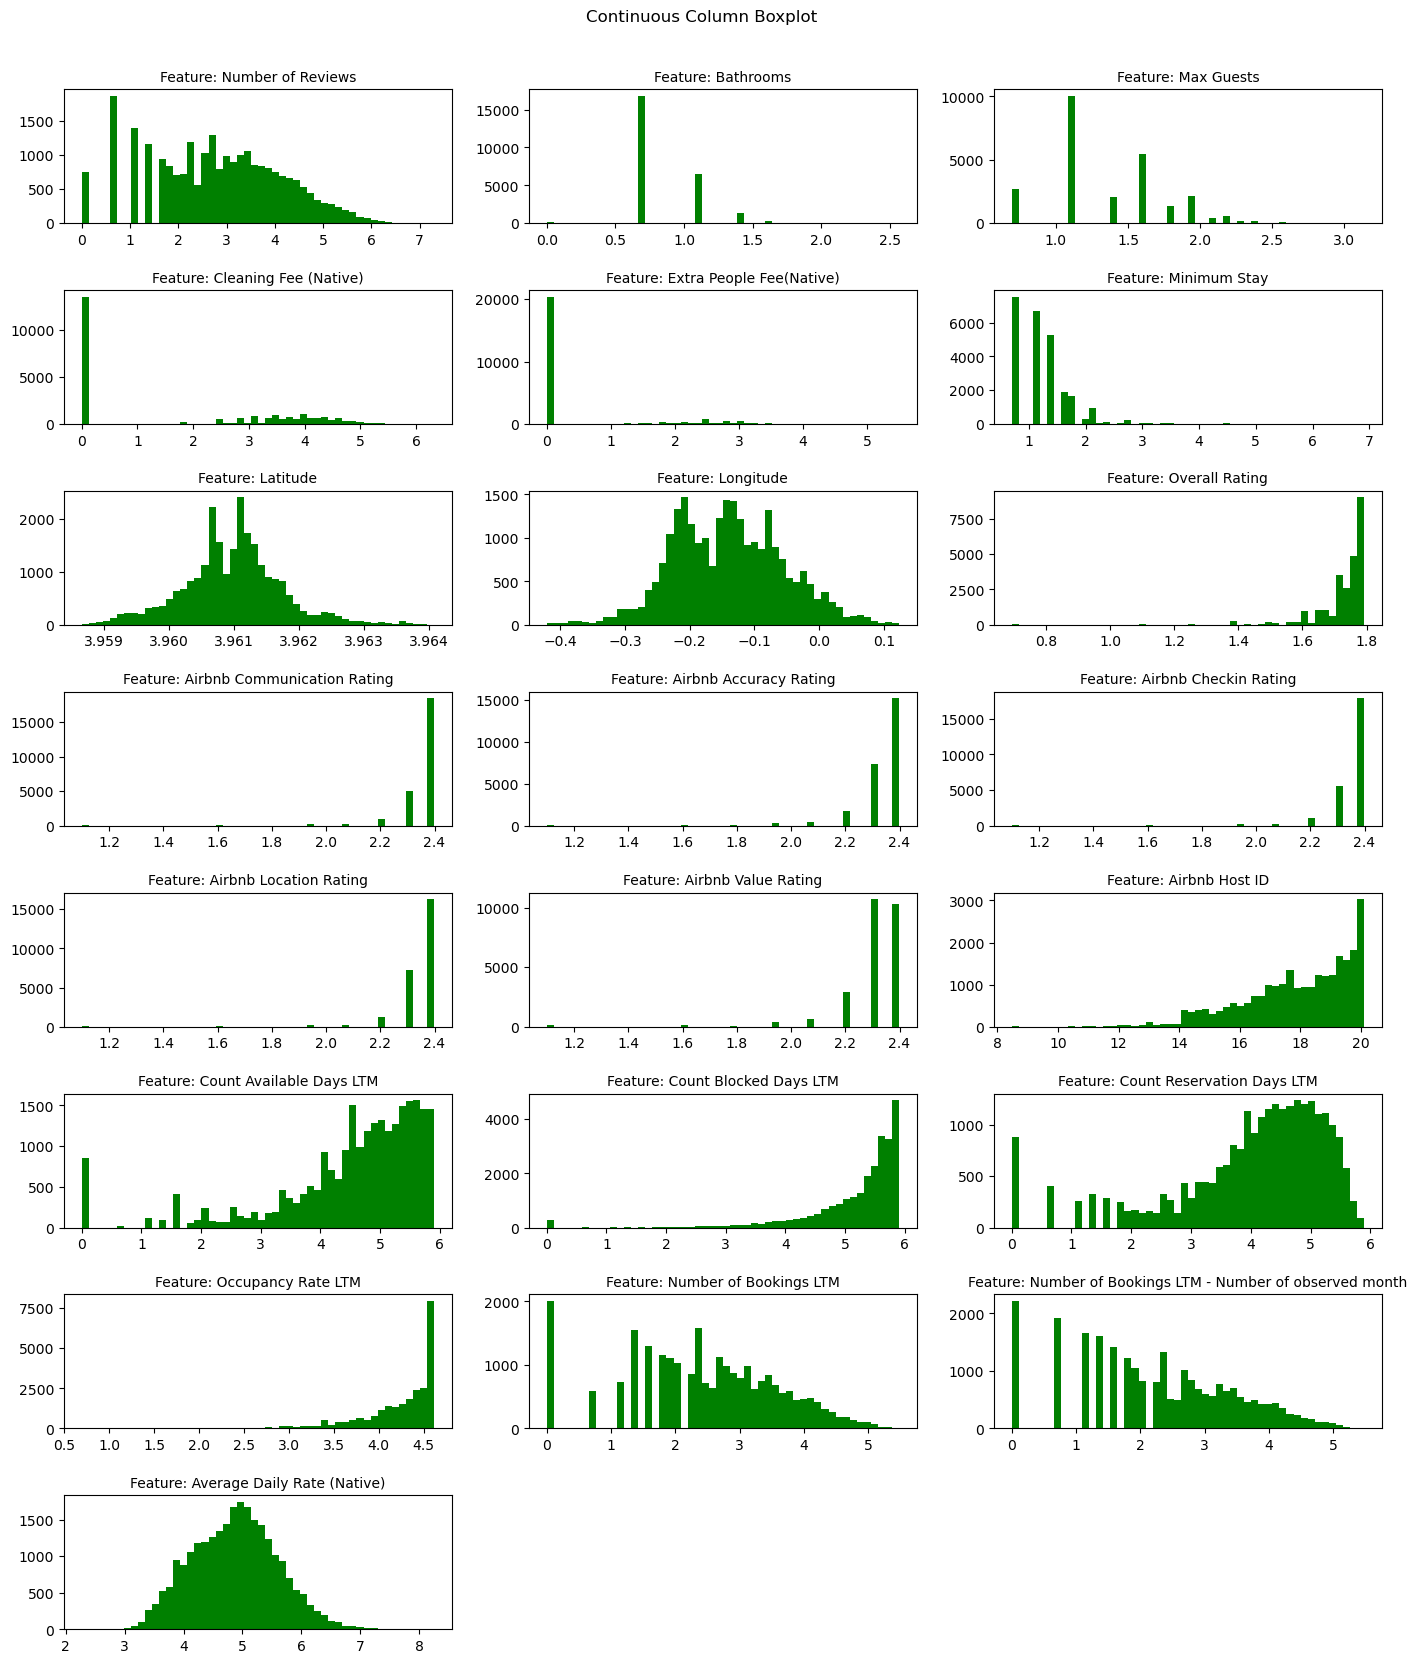

In [11]:
# Calculate the number of rows and columns for the subplots
cols = 3
rows = len(X_log_finite.columns) // cols + 1

# Create the subplots
plt.figure(figsize=(17, 20))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Continuous Column Boxplot', y=0.92)

# Plot histograms for each column
for i, column in enumerate(X_log_finite.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.hist(X_log_finite[column], bins=50, color='green')

plt.show()

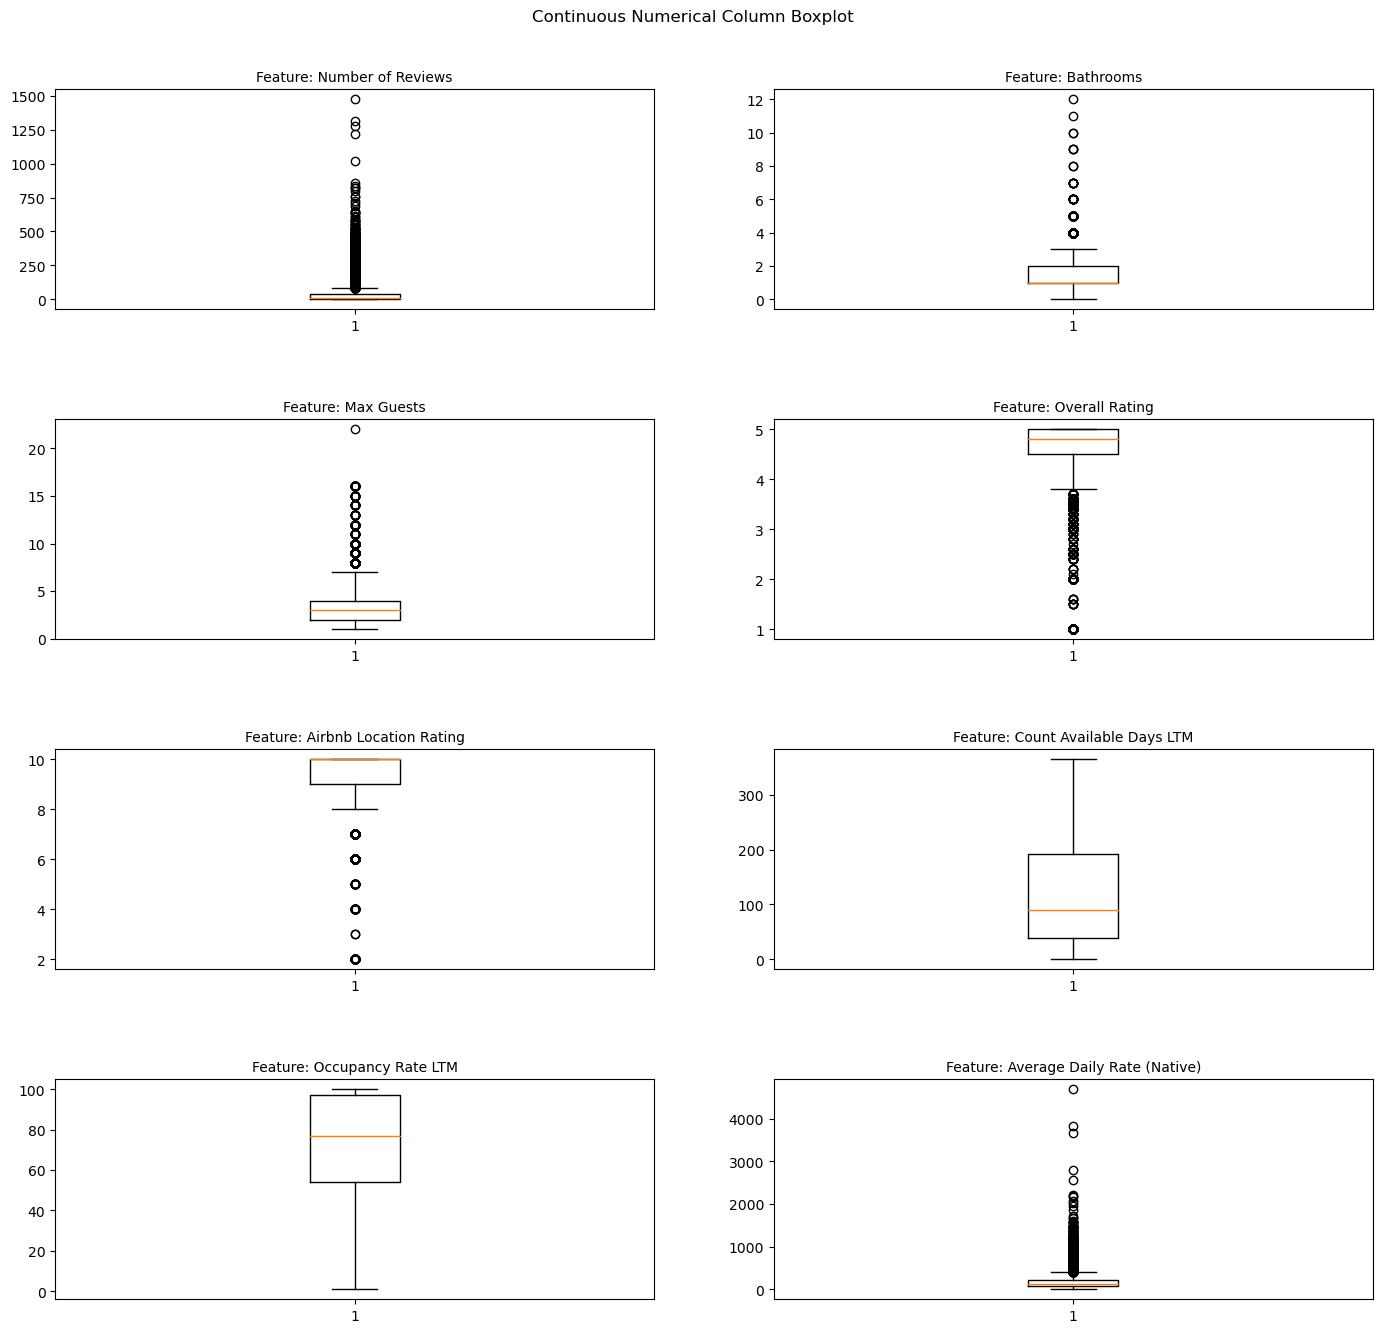

In [12]:
# calculate the number of rows and columns for the subplots:
cols = 2
rows = len(boxplot_df.columns) // cols + 1

# create the subplots
plt.figure(figsize = (17,20))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Continuous Numerical Column Boxplot', y=0.92)

# Plot histograms for each column
for i, column in enumerate(boxplot_df.columns):
    ax=plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.boxplot(boxplot_df[column])
    
plt.show()

## Column Correlations

During the cleaning stage, several columns that were deemed redundant were dropped. Columns actual meaning must be explored further, correlations between the various numerical columns will be found, to determine if any columns are semantically the same. All individual variable columns must be independent of each other (have low collinearity), otherwise future models can be negatively effected.

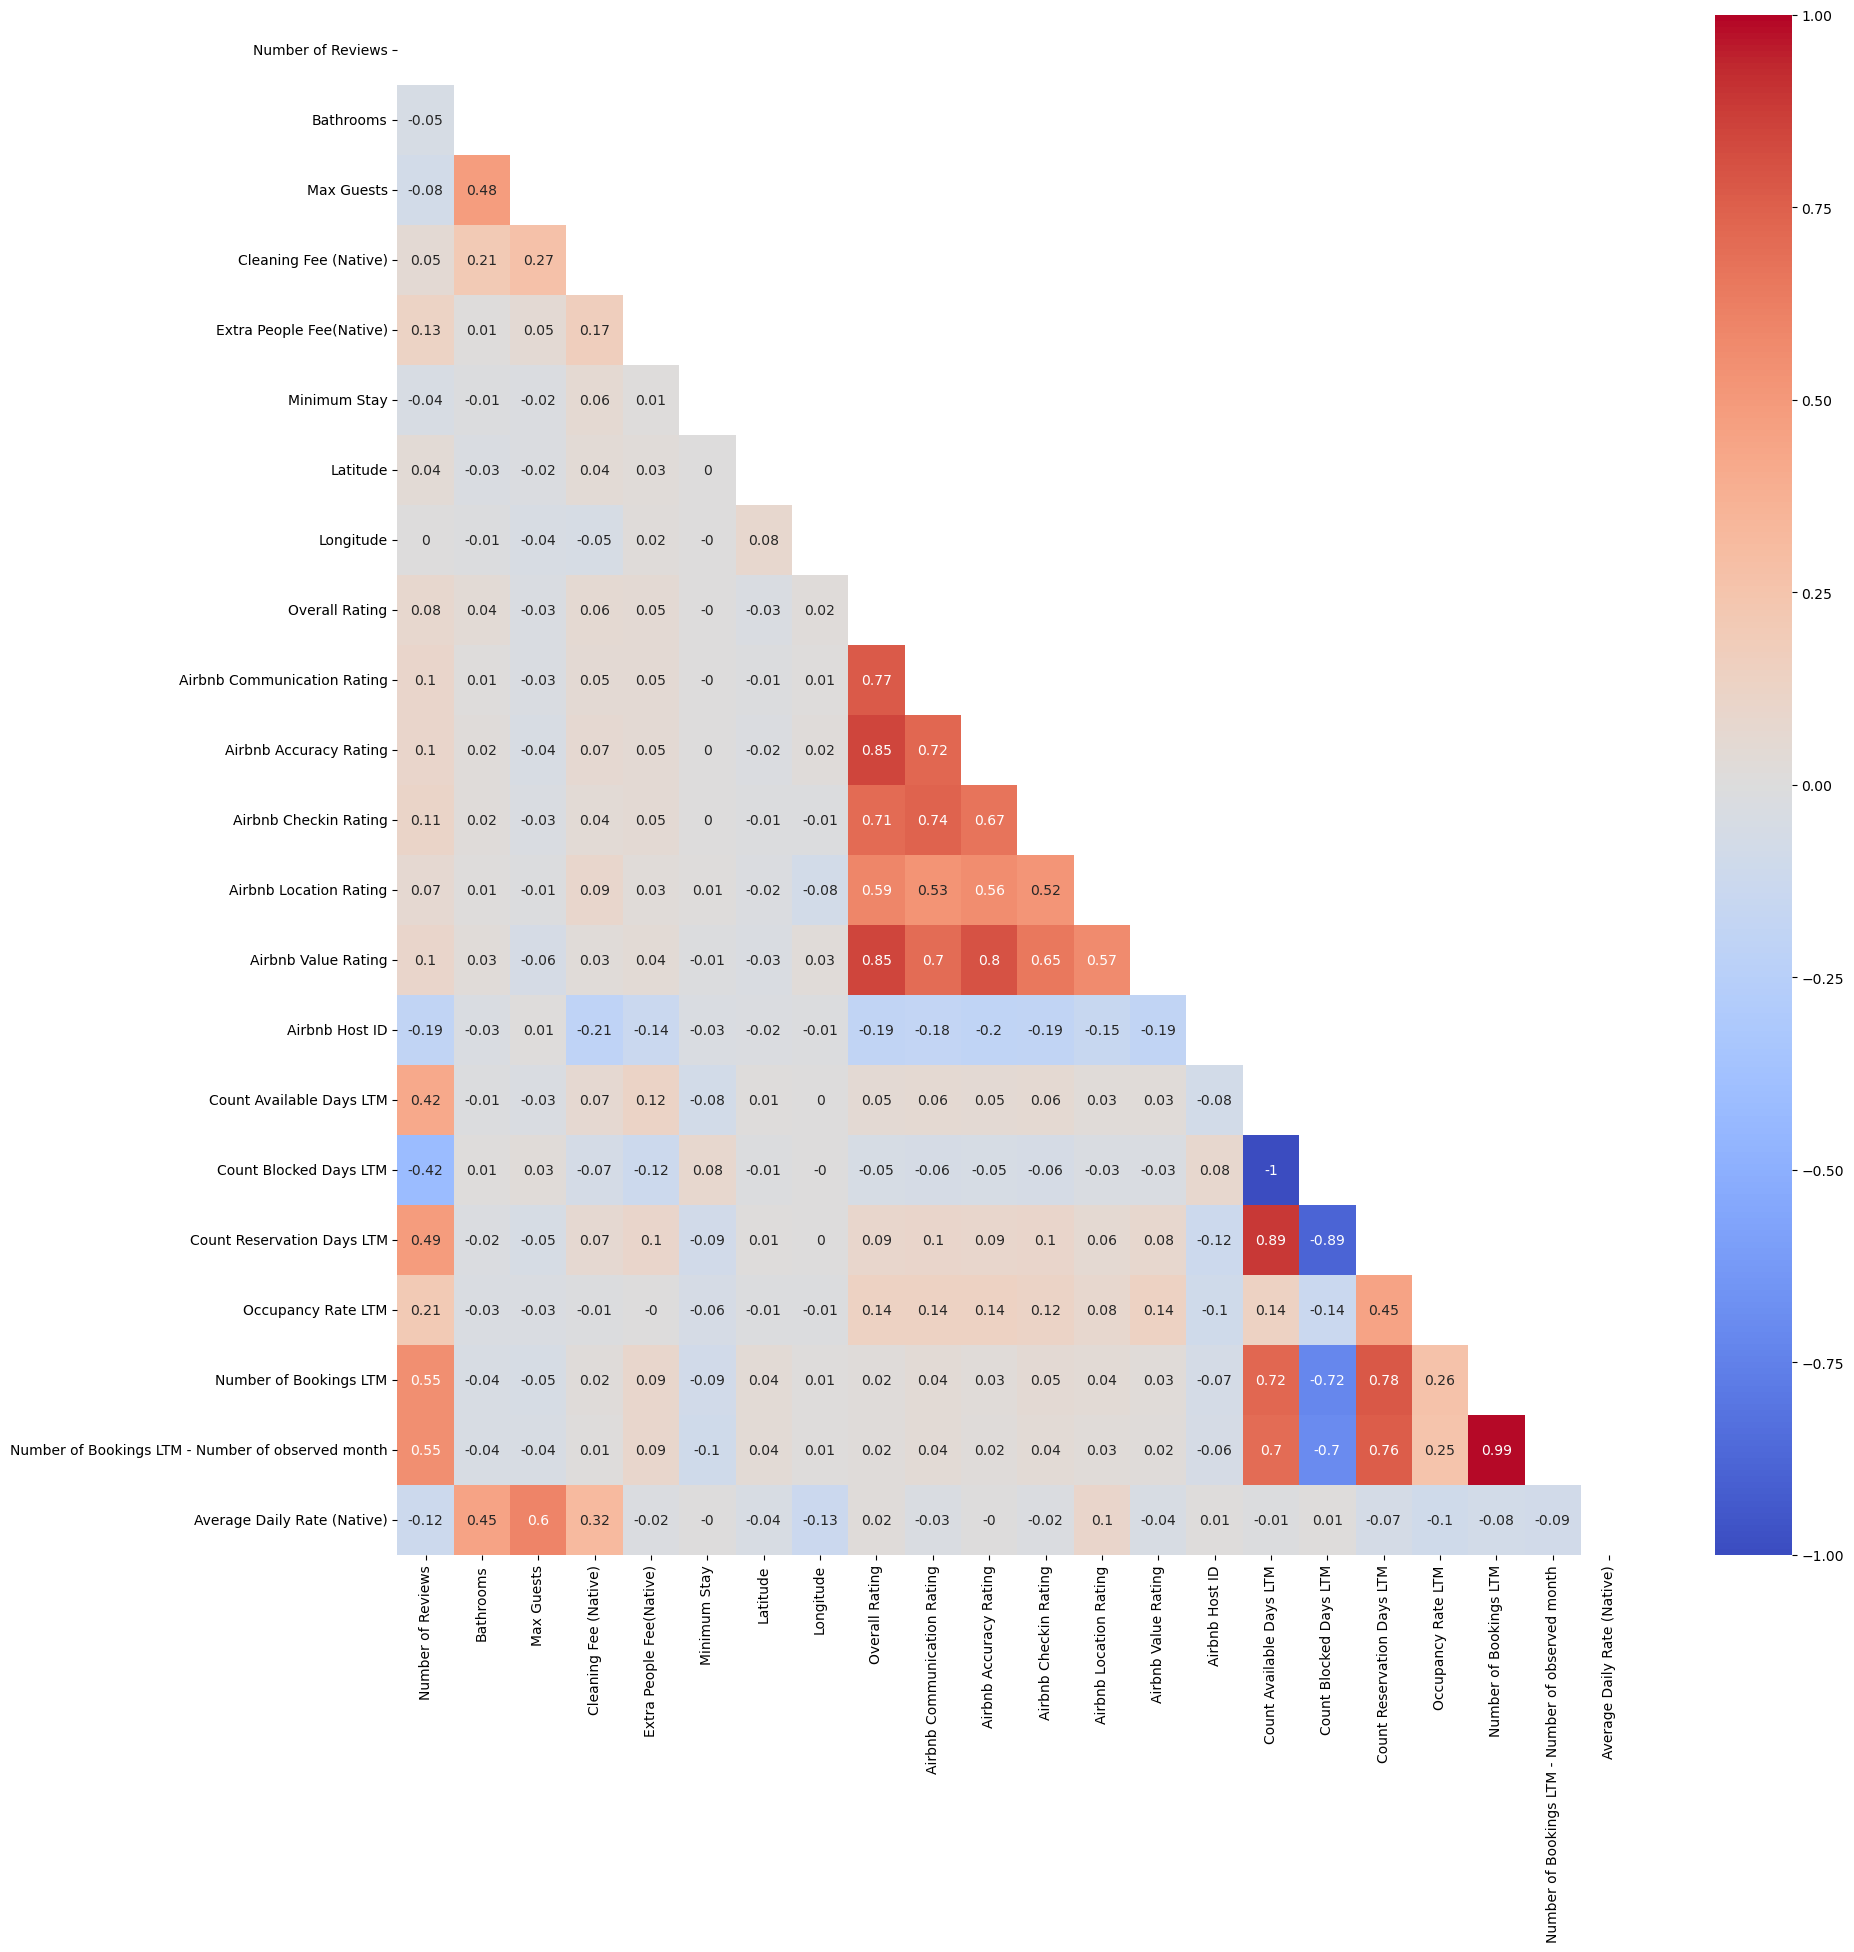

In [13]:
# calculate all the correlations between each independent numerical variable

def plot_corr_heatmap(X_num_cols):
    corr_df = X_num_cols.corr()

    # mask for upper-triangle
    mask = np.triu(corr_df)

    # vaisualise heatmap
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_df.round(2),
                annot=True,
                center=0,
                vmax=1,
                vmin=-1,
                mask=mask,
                cmap='coolwarm')
    plt.show()

plot_corr_heatmap(X_num_cols)

The above correlation headmap shows there are some significant correlations several of the independent variables.

The multicollinearity between the independent variables can be dealt with with correct model and hyperparameter tuning.

There are a few columns that can immediately be viewed as semantically relevant. Two to highlight at this stage, are the 'Average Daily Rate (Native)' and the 'Count Reservation Day LTM'. It would make sense, that properties that are occupied for a larger portion of the year and those that charge a greater nightly rate, would have a higher annual revenue.

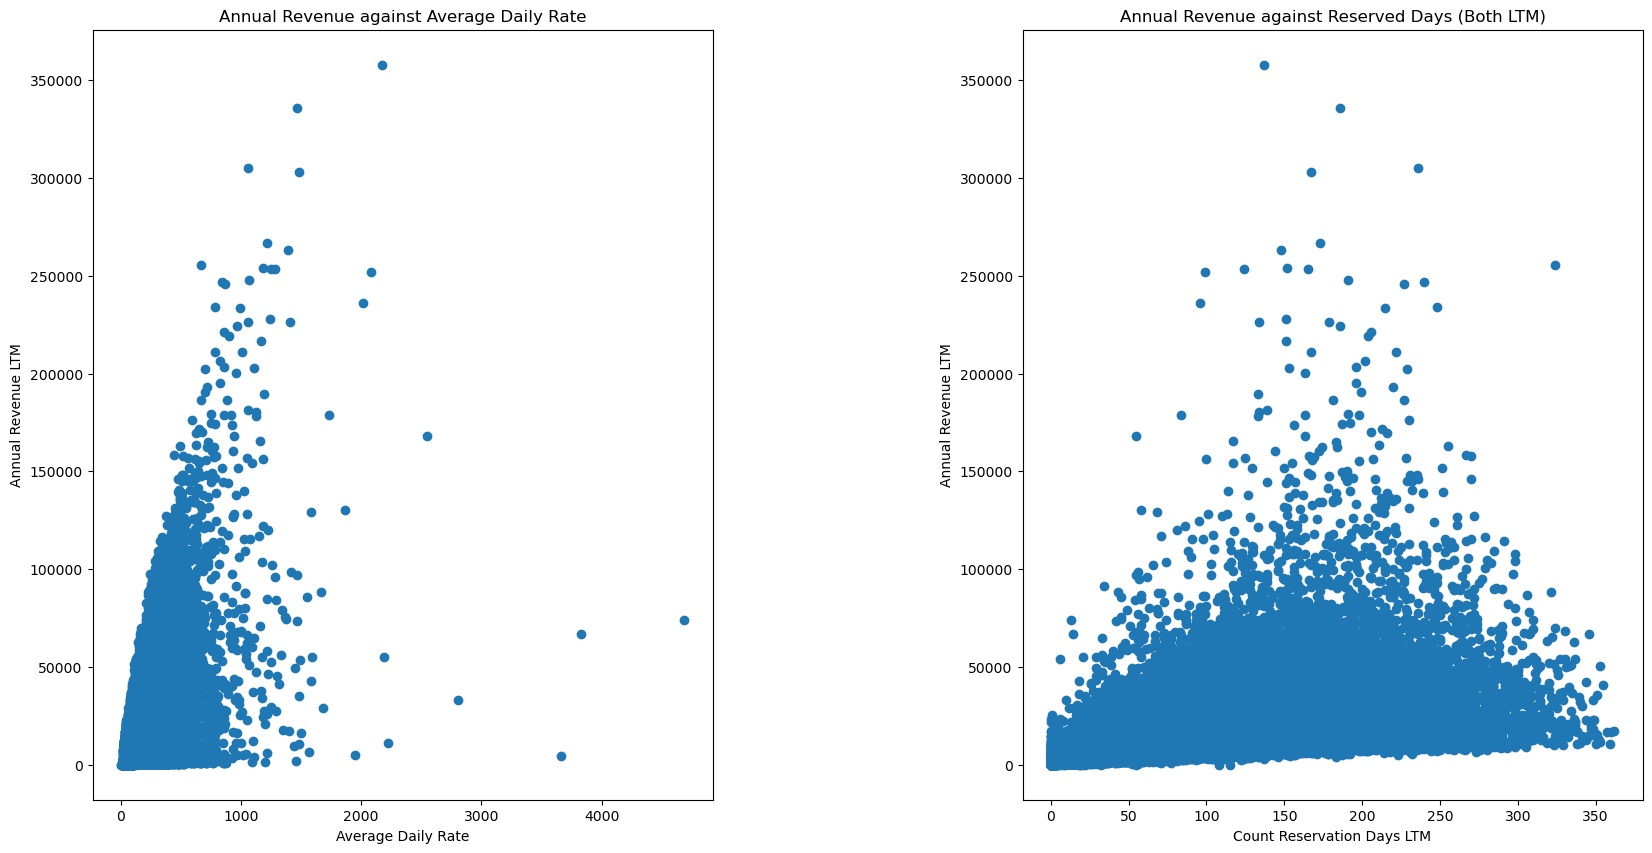

In [14]:
plt.subplots(1,2, figsize=(20, 10), gridspec_kw={'wspace': 0.5})

plt.subplot(1,2,1)
plt.scatter(X_num_cols['Average Daily Rate (Native)'], y)
plt.xlabel('Average Daily Rate')
plt.ylabel('Annual Revenue LTM')
plt.title('Annual Revenue against Average Daily Rate')

plt.subplot(1,2,2)
plt.scatter(X_num_cols['Count Reservation Days LTM'], y)
plt.xlabel('Count Reservation Days LTM')
plt.ylabel('Annual Revenue LTM')
plt.title('Annual Revenue against Reserved Days (Both LTM)')

plt.show()

In [15]:
print(f"The correlation between the annual revenue and the average daily rate is {round(y.corr(X_num_cols['Average Daily Rate (Native)']),2)}.")
print(f"The correlation between the annual revenue and the number of reservation days is {round(y.corr(X_num_cols['Count Reservation Days LTM']),2)}.")

The correlation between the annual revenue and the average daily rate is 0.55.
The correlation between the annual revenue and the number of reservation days is 0.57.


All numerical columns correlations will be compared against the target column:

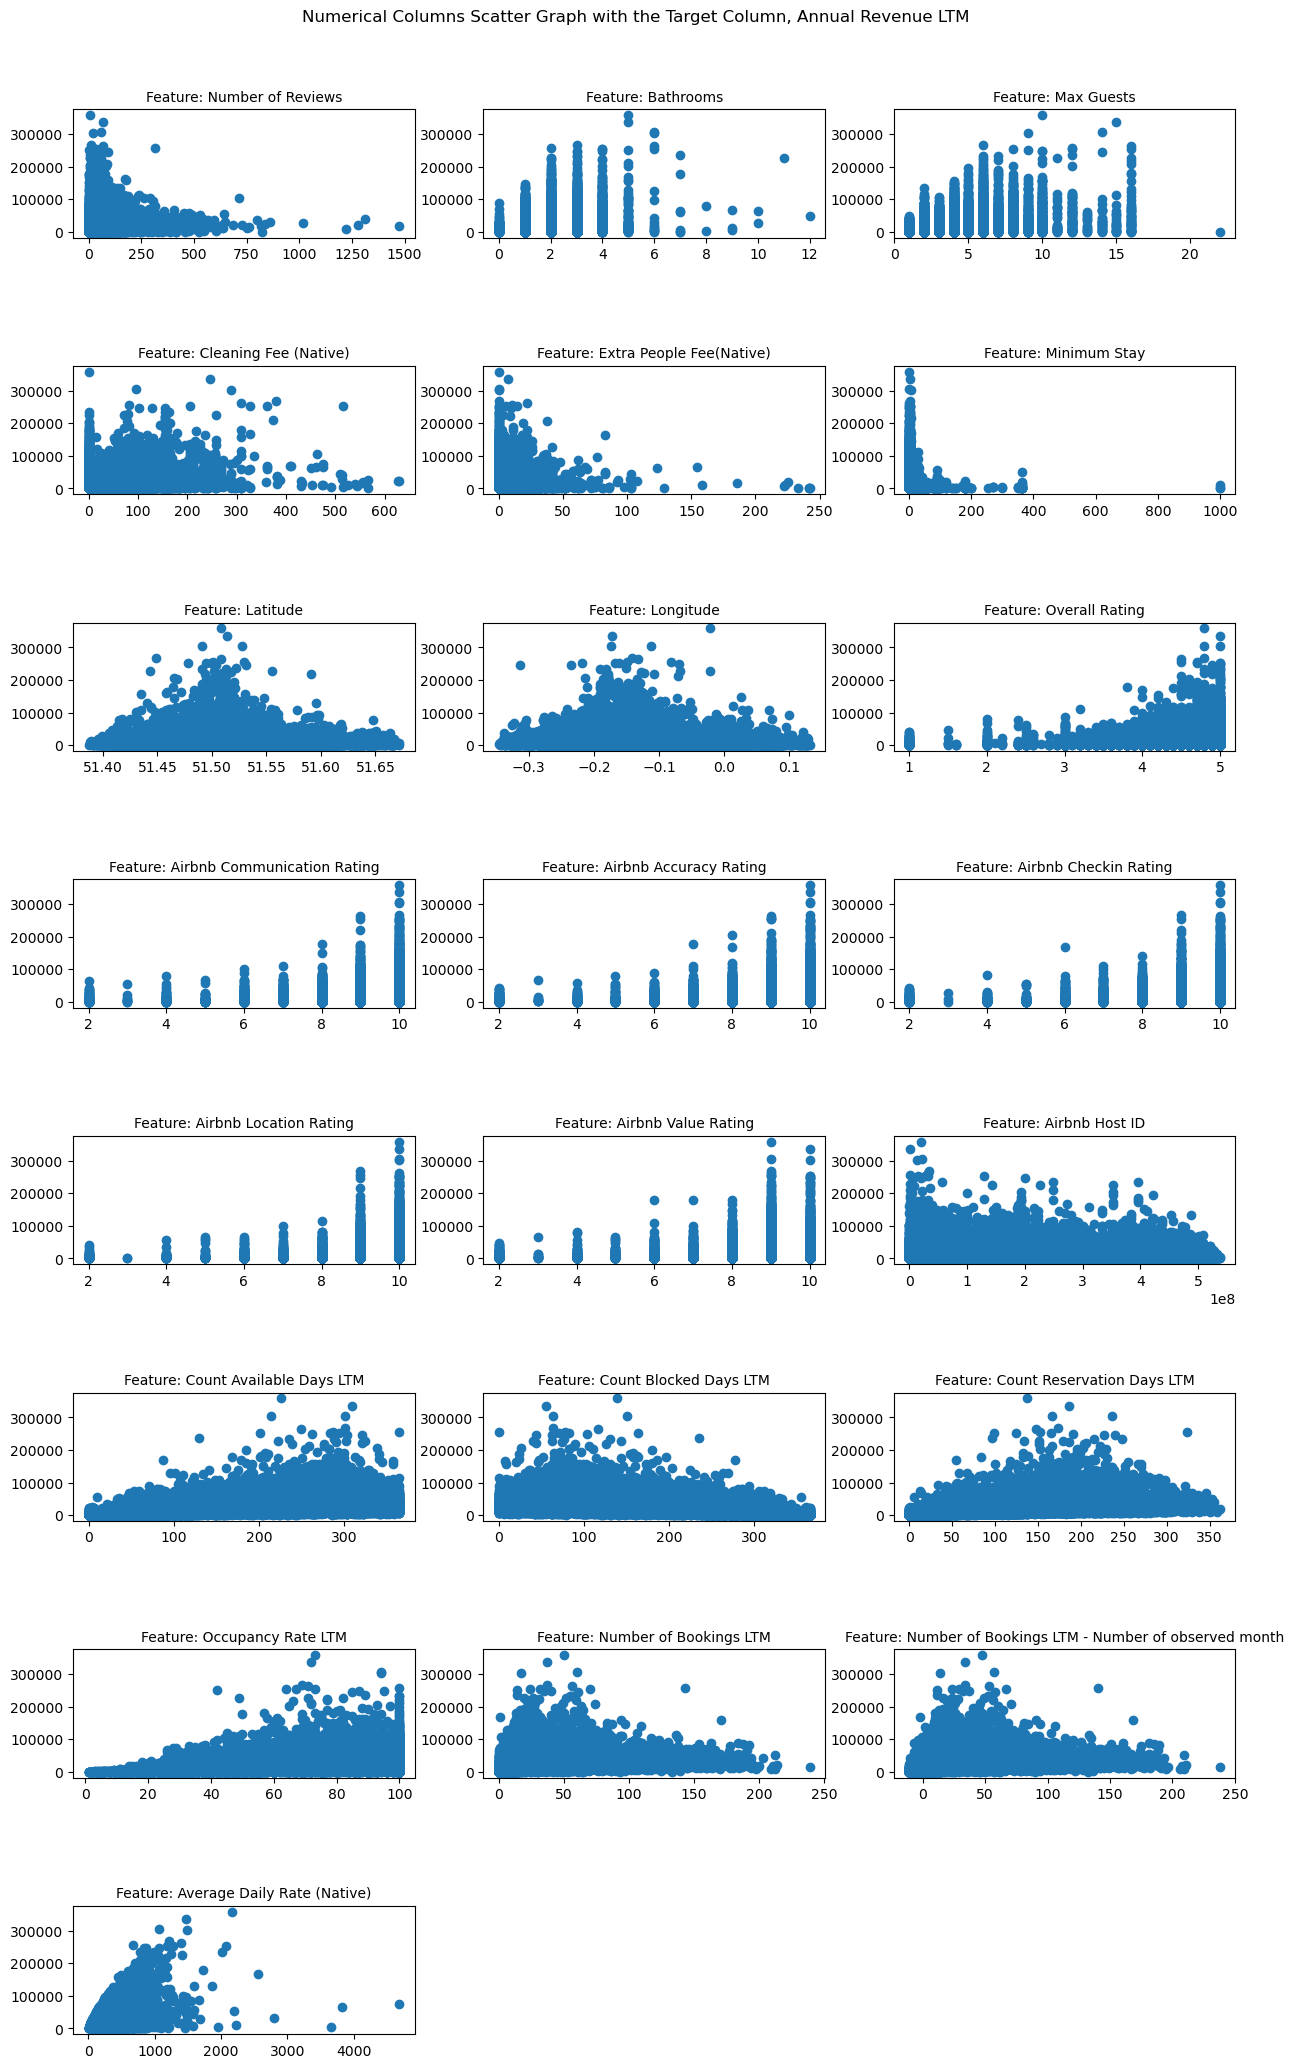

In [16]:
# create a subplots structure with 3 columns and 8 rows
cols = 3
rows = len(X_num_cols.columns)//cols + 1

plt.figure(figsize=(15, 25))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Numerical Columns Scatter Graph with the Target Column, Annual Revenue LTM', y=0.92)

for i, column in enumerate(X_num_cols.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.scatter(X_num_cols[column], y)


plt.show()

## Categorical Columns

In [17]:
X_cat_cols.head().T

,0,1,2,3,4
Listing Title,Cozy 2BR house with a garden view,GuestReady - Amazing home with a private garden,Cosy cottage on Richmond Park,"Entire Flat. Free parking, Garden , Richmond park",Maisonette inbetween Richmond Park and Wimbledon
Property Type,Entire home,Entire home,Entire home,Entire rental unit,Private room in rental unit
Listing Type,entire_home,entire_home,entire_home,entire_home,private_room
City,Greater London,Greater London,Greater London,Greater London,Greater London
Zipcode,SW15 3,SW15 3,SW15 3,SW15 3,SW15 3
Bedrooms,2,2,1,2,1
Airbnb Superhost,f,t,f,f,f
Cancellation Policy,strict_14_with_grace_period,NaN,NaN,strict_14_with_grace_period,strict_14_with_grace_period
Check-in Time,12:00 PM - 12:00 AM,3:00 PM - 12:00 AM,After 3:00 PM,3:00 PM - 11:00 PM,12:00 PM - 10:00 PM
Checkout Time,10:00 AM,11:00 AM,11:00 AM,11:00 AM,11:00 AM


Looking at some of the text columns. Initially, the 'guest_controls' will be investigated. 

The guest control column looks to be made up of numerous boolean catgories, such as 'allows_children'. The quantity of different categorical binary values will be determined:

In [18]:
# Splitting the guest_controls to determine the number of specific features:
len([x.split(':')[0] for x in X_cat_cols['guest_controls'][0][1:].split(', ')])

40

There have been found to be 40 different categories withhin the the guest_controls column. These can be split and analysed more intricately in due course.

## Postcode Relevance

The influence different regions have on the target colujmn will be investigated. To accurately model the dataset based on regions, the different rows must be grouped based on relevant locational differences. There are several columns that have locational information, these are: 'City', 'Zipcode' (sometimes referred to as Postcode), 'Latitude' and 'Longitude'. All of these different columns contain information that can, and will, be useful at different points in this project. For now, the easiest way to split the various rows of information is using the 'Zipcode' column.

Dataframes will be created for each of the different main London postal code prefix regions (denoted by the first or first two characters of the Zipcode). These are: W, WC, SW, NW, N, E, EC, SE.

In [19]:
# Create dataframes for each of the different postcode combinations in London:
w_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

n_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('W')]

e_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') &
                    ~airbnb_ldn['Zipcode'].str.slice(1,2).str.contains('C')]

wc_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.contains('WC')]

nw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW')]

sw_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW')]

se_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE')]

ec_zip = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('EC')]

The main dataframe has been split into separate dataframes for each London postcode prefix. 

The mean of the 'Average Daily Rate (Native)', will be plotted:

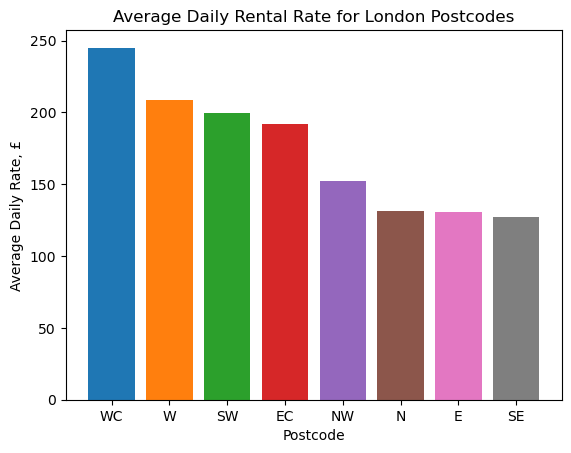

In [20]:
plt.figure()
plt.bar('WC', wc_zip['Average Daily Rate (Native)'].mean())
plt.bar('W', w_zip['Average Daily Rate (Native)'].mean())
plt.bar('SW', sw_zip['Average Daily Rate (Native)'].mean())
plt.bar('EC', ec_zip['Average Daily Rate (Native)'].mean())
plt.bar('NW', nw_zip['Average Daily Rate (Native)'].mean())
plt.bar('N', n_zip['Average Daily Rate (Native)'].mean())
plt.bar('E', e_zip['Average Daily Rate (Native)'].mean())
plt.bar('SE', se_zip['Average Daily Rate (Native)'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Daily Rental Rate for London Postcodes')
plt.show()

Looking at the bar chart above, it can be seen that the three most expensive regions all have a 'W' in their postcode prefix. This would indicate, that rental properties in the various western regions of London, tend to demand a higher daily rental rate.

Hence, an initial insight is that there does definitely seem to be some correlation between London region and average daily rental rate. Will the conclusion being that properties with a 'W' in their prefix tend to be more expensive to rent.

Now, the quantity of Airbnb properties within different postcodes will be investigated:

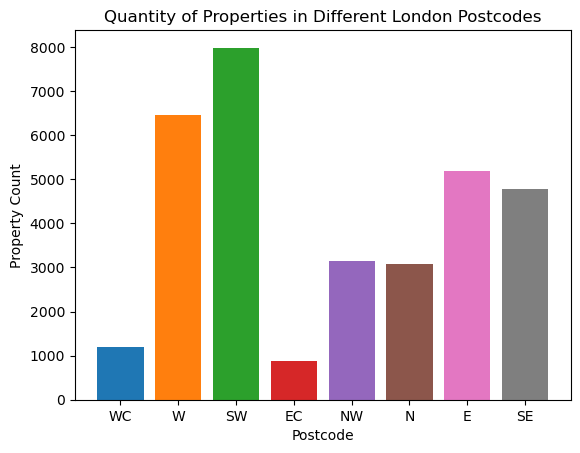

In [21]:
# determining the number of airbnb properties within each postcode:

plt.figure()
plt.bar('WC', len(wc_zip))
plt.bar('W', len(w_zip))
plt.bar('SW', len(sw_zip))
plt.bar('EC', len(ec_zip))
plt.bar('NW', len(nw_zip))
plt.bar('N', len(n_zip))
plt.bar('E', len(e_zip))
plt.bar('SE', len(se_zip))
plt.xlabel('Postcode')
plt.ylabel('Property Count')
plt.title('Quantity of Properties in Different London Postcodes')
plt.show()

From the bar chart above, it can be seen that 'SW' and 'W' are the two postal regions with the highest quantity of Airbnb properties, these are also two of the most expensive areas to rent.

Initially, it could be suggested that W and SW would be good places to invest in an Airbnb property. This will be investigated further to determine the relative success of Airbnb properties within these areas:

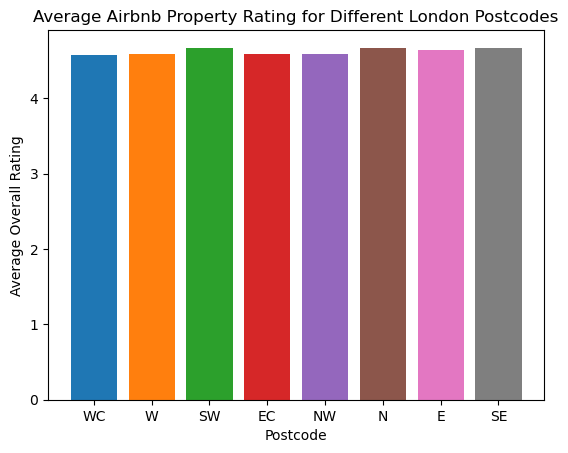

In [22]:
# plotting average overall rating against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Overall Rating'].mean())
plt.bar('W', w_zip['Overall Rating'].mean())
plt.bar('SW', sw_zip['Overall Rating'].mean())
plt.bar('EC', ec_zip['Overall Rating'].mean())
plt.bar('NW', nw_zip['Overall Rating'].mean())
plt.bar('N', n_zip['Overall Rating'].mean())
plt.bar('E', e_zip['Overall Rating'].mean())
plt.bar('SE', se_zip['Overall Rating'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Overall Rating')
plt.title('Average Airbnb Property Rating for Different London Postcodes')
plt.show()

The results are very close, but it looks as though 'SW' potentially has the highest average rating. This will be confirmed numerically: 

In [23]:
print(f"The average overall rating for WC properties is {round(wc_zip['Overall Rating'].mean(),2)} stars")
print(f"The average overall rating for W properties is {round(w_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for SW properties is {round(sw_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for EC properties is {round(ec_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for NW properties is {round(nw_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for N properties is {round(n_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for E properties is {round(e_zip['Overall Rating'].mean(), 2)} stars")
print(f"The average overall rating for SE properties is {round(se_zip['Overall Rating'].mean(), 2)} stars")

The average overall rating for WC properties is 4.58 stars
The average overall rating for W properties is 4.59 stars
The average overall rating for SW properties is 4.66 stars
The average overall rating for EC properties is 4.58 stars
The average overall rating for NW properties is 4.59 stars
The average overall rating for N properties is 4.67 stars
The average overall rating for E properties is 4.64 stars
The average overall rating for SE properties is 4.67 stars


It can be seen that N and SE, are the leaders with approximately the same average rating of 4.67 and SW just behind with 4.66.

Now the average occupancy rate for each postcode will be assessed. Areas that charge a lot, have lots of properties and high ratings may not have much demand and hence can't necessarily be considered successful. This plot will be very influencial throughout the entire analysis:

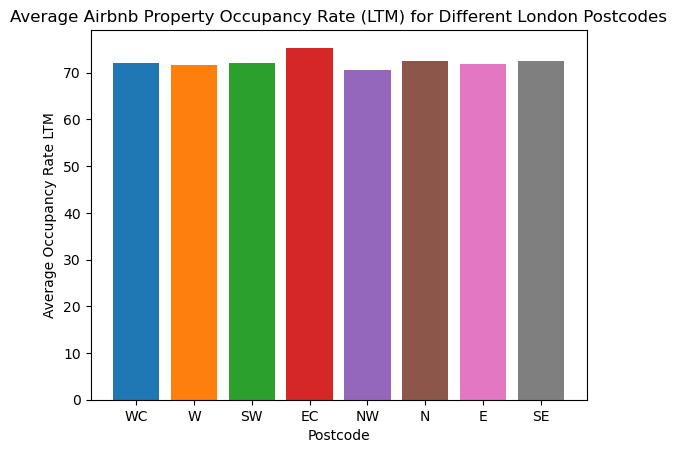

In [24]:
# plotting average occupancy rate against postcode region:

plt.figure()
plt.bar('WC', wc_zip['Occupancy Rate LTM'].mean())
plt.bar('W', w_zip['Occupancy Rate LTM'].mean())
plt.bar('SW', sw_zip['Occupancy Rate LTM'].mean())
plt.bar('EC', ec_zip['Occupancy Rate LTM'].mean())
plt.bar('NW', nw_zip['Occupancy Rate LTM'].mean())
plt.bar('N', n_zip['Occupancy Rate LTM'].mean())
plt.bar('E', e_zip['Occupancy Rate LTM'].mean())
plt.bar('SE', se_zip['Occupancy Rate LTM'].mean())
plt.xlabel('Postcode')
plt.ylabel('Average Occupancy Rate LTM')
plt.title('Average Airbnb Property Occupancy Rate (LTM) for Different London Postcodes')
plt.show()

The graph above shows that on the whole, all London postal regions have very high average occupation rates over the last 12 months; with EC having the highest. The previously identified areas of high rental income (WC, W, SW) all have average occupancy rates over 70%, proving that demand is high regardless of the rental amount. 

Hence, an immediate insight to prospective Airbnb property investors would be that purchasing a property with a W postcode would be a safebet in ensuring a high return on your initial investment. High rental rates, high overall ratings and high occupancy rates point to a very successful region.

### Looking at the correlation between overall rating and daily rental rate

This comparison will be completed to see how the 'Avaerage Daily Rate' and the overall rating the property receives are related. 

First, the number of variables of overall ratings will be determined:

In [25]:
print(f"The maximum rating a property can receive is {airbnb_ldn['Overall Rating'].max()} stars")
print(f"The minimum rating a property can receive is {airbnb_ldn['Overall Rating'].min()} stars")

The maximum rating a property can receive is 5.0 stars
The minimum rating a property can receive is 1.0 stars


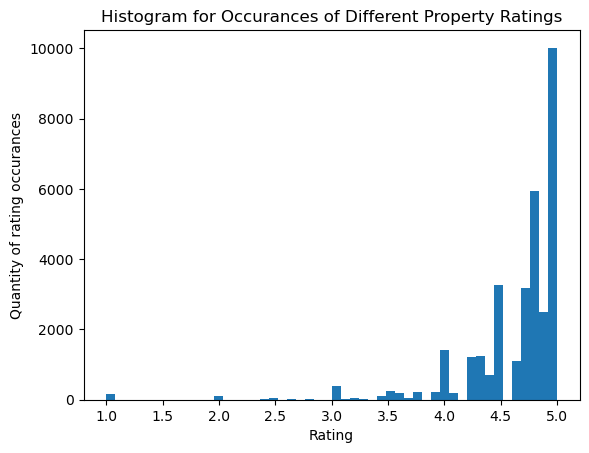

In [26]:
plt.figure()
plt.hist(airbnb_ldn['Overall Rating'], bins = 50)
plt.ylabel('Quantity of rating occurances')
plt.xlabel('Rating')
plt.title('Histogram for Occurances of Different Property Ratings')
plt.show()

It can be seen that the vast majority of ratings are above approximately 4.2 stars. Hence, the majority of London airbnb rental properties can be deemed to be of a high quality already.

These ratings and the average daily rate will now be compared:

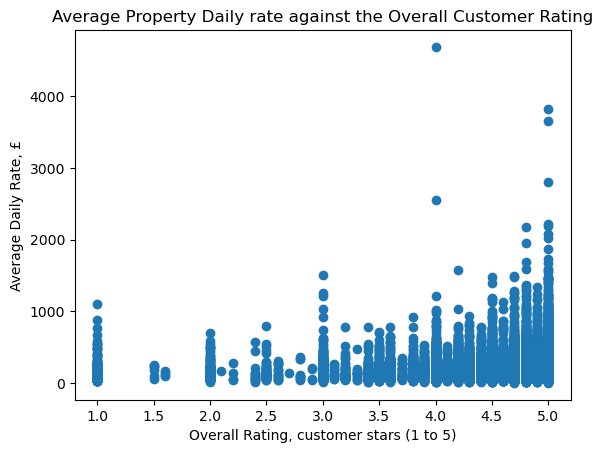

In [27]:
plt.figure()
plt.scatter(airbnb_ldn['Overall Rating'], airbnb_ldn['Average Daily Rate (Native)'])
plt.xlabel('Overall Rating, customer stars (1 to 5)')
plt.ylabel('Average Daily Rate, £')
plt.title('Average Property Daily rate against the Overall Customer Rating')
plt.show()

In [28]:
print(f"The correlation between the annual revenue and the overall rating is {round(X_num_cols['Average Daily Rate (Native)'].corr(X_num_cols['Overall Rating']),2)}.")


The correlation between the annual revenue and the overall rating is 0.02.


There does not look to be significantly trend between the properties grouped by their 'Overall Rating' and the 'Average Daily Rate' of properties within each rating group. One insight, it does seem properties with 5* rating are consistently the most expensive per day. Hence, properties that recieve the higest ratings are also it seems the most luxurious; it cannot be determined from this graph alone what qualities of these properteis account for their high price, whether it be quality or location etc.

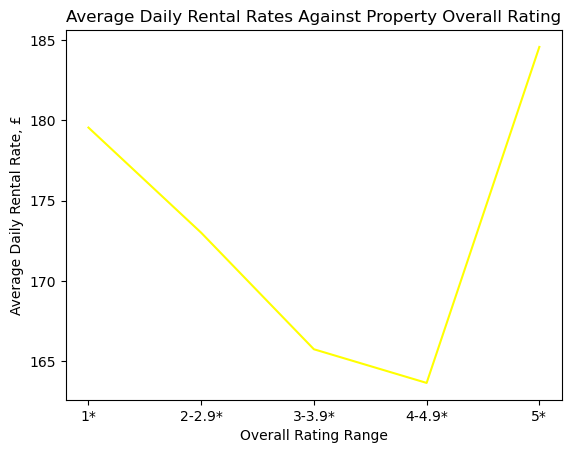

In [29]:
# ranged data

X_values = ['1*', '2-2.9*', '3-3.9*', '4-4.9*', '5*']

y_values = [
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]['Average Daily Rate (Native)'].mean(),
            airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)]['Average Daily Rate (Native)'].mean()
            ]
            
plt.plot(X_values, y_values, color='yellow')
plt.xlabel('Overall Rating Range')
plt.ylabel('Average Daily Rental Rate, £')
plt.title('Average Daily Rental Rates Against Property Overall Rating')
plt.show()


There looks looks as though properties that fall within the 4-4.9* rating range are the cheapest per night. It has already  been determined that the marjority of properties fall within this rating range. Therefore the more expensive values for the over star ratings, could be due to there being less properties with these ratings, meaning the expensive outliers have more of an influence in impacting the average. Interestingly, properties with 5* ratings have the highest average daily rate, being significantly more than those with 4-4.9* ratings. This indicates that those ultra high end properties are the most likely to receive 5*.

Determining the quantity of properties with different ratings:

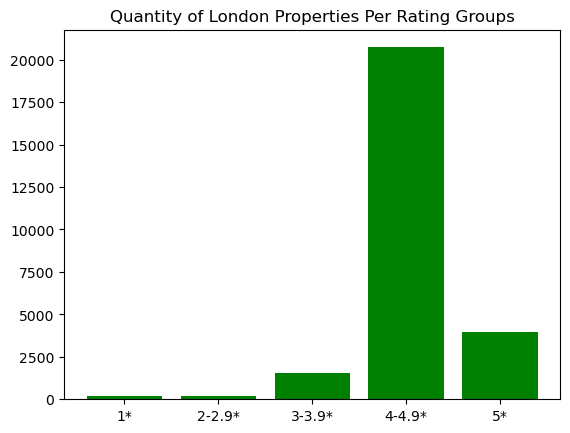

In [30]:
y_rating_quantities = [len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 1) & (airbnb_ldn['Overall Rating'] <= 1.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 2) & (airbnb_ldn['Overall Rating'] <= 2.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 3) & (airbnb_ldn['Overall Rating'] <= 3.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] >= 4) & (airbnb_ldn['Overall Rating'] <= 4.9)]),
                        len(airbnb_ldn[(airbnb_ldn['Overall Rating'] == 5)].value_counts())]

plt.bar(X_values, y_rating_quantities, color = 'green')
plt.title('Quantity of London Properties Per Rating Groups')
plt.show()

It can be seen, that the vast majorty of London based properties fall in the 4-4.9* rating. 

## EDA on the Target Column

The target column is the 'Annual Revenue (LTM)' column. 

This column will be explored further:

In [31]:
airbnb_ldn['Annual Revenue LTM (Native)'].describe()

count     32674.000000
mean      15535.650000
std       20743.110435
min           6.300000
25%        2983.200000
50%        8797.400000
75%       20013.900000
max      357897.700000
Name: Annual Revenue LTM (Native), dtype: float64

The above shows the significant spread of annual revenue received by London properties. The significant jump from the 75% and the mean value to the max value, indicates there are some outlier properties which make an usually large annual revenue; as well as the dip from the 25% value to the min. 

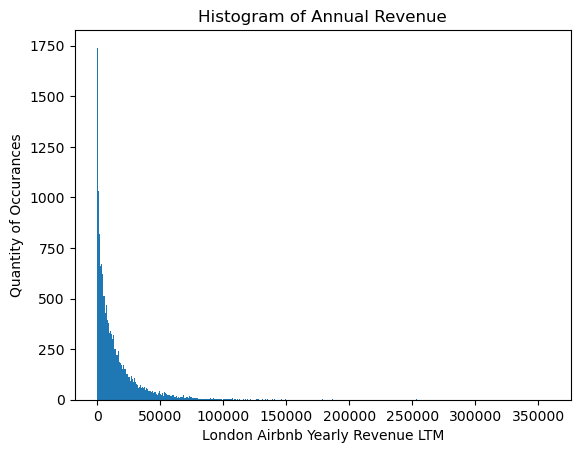

In [32]:
plt.figure()
plt.hist(airbnb_ldn['Annual Revenue LTM (Native)'], bins=1000)
plt.xlabel('London Airbnb Yearly Revenue LTM')
plt.ylabel('Quantity of Occurances')
plt.title('Histogram of Annual Revenue')
plt.show()

The yearly revenue histogram indicates a very right skewed distribution.

A log transformation of the target column will be taken.

In [33]:
# Log scale target column, add 1 to avoid taking the log of 0
y_log = np.log(y + 1)

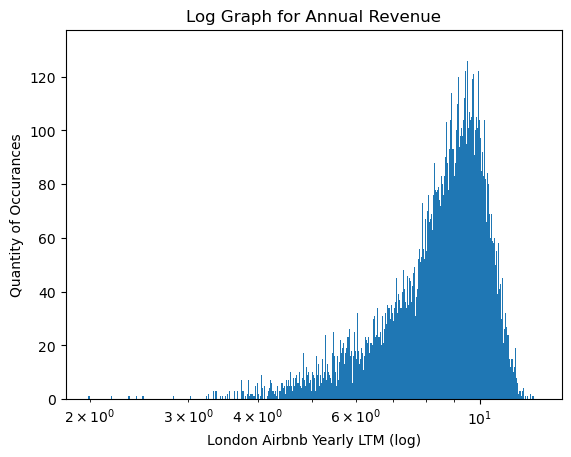

In [34]:
# Plot the same graph but using a 'log' scale on the x-axis, to see how this alteres/improves the distribution
plt.figure()
plt.hist(y_log, bins=1000)
plt.xlabel('London Airbnb Yearly LTM (log)')
plt.ylabel('Quantity of Occurances')
plt.title('Log Graph for Annual Revenue')
plt.xscale('log')
plt.show()

The 'log' tranformed graph shows a more normally distributed pattern (slightly left-skewed).

The standard x-values have already been plotted against the target variable. The log transformed x-values can be plotted against the target column. Comparing the log transformed versions may improve the correlations between the independent variables and target column. 

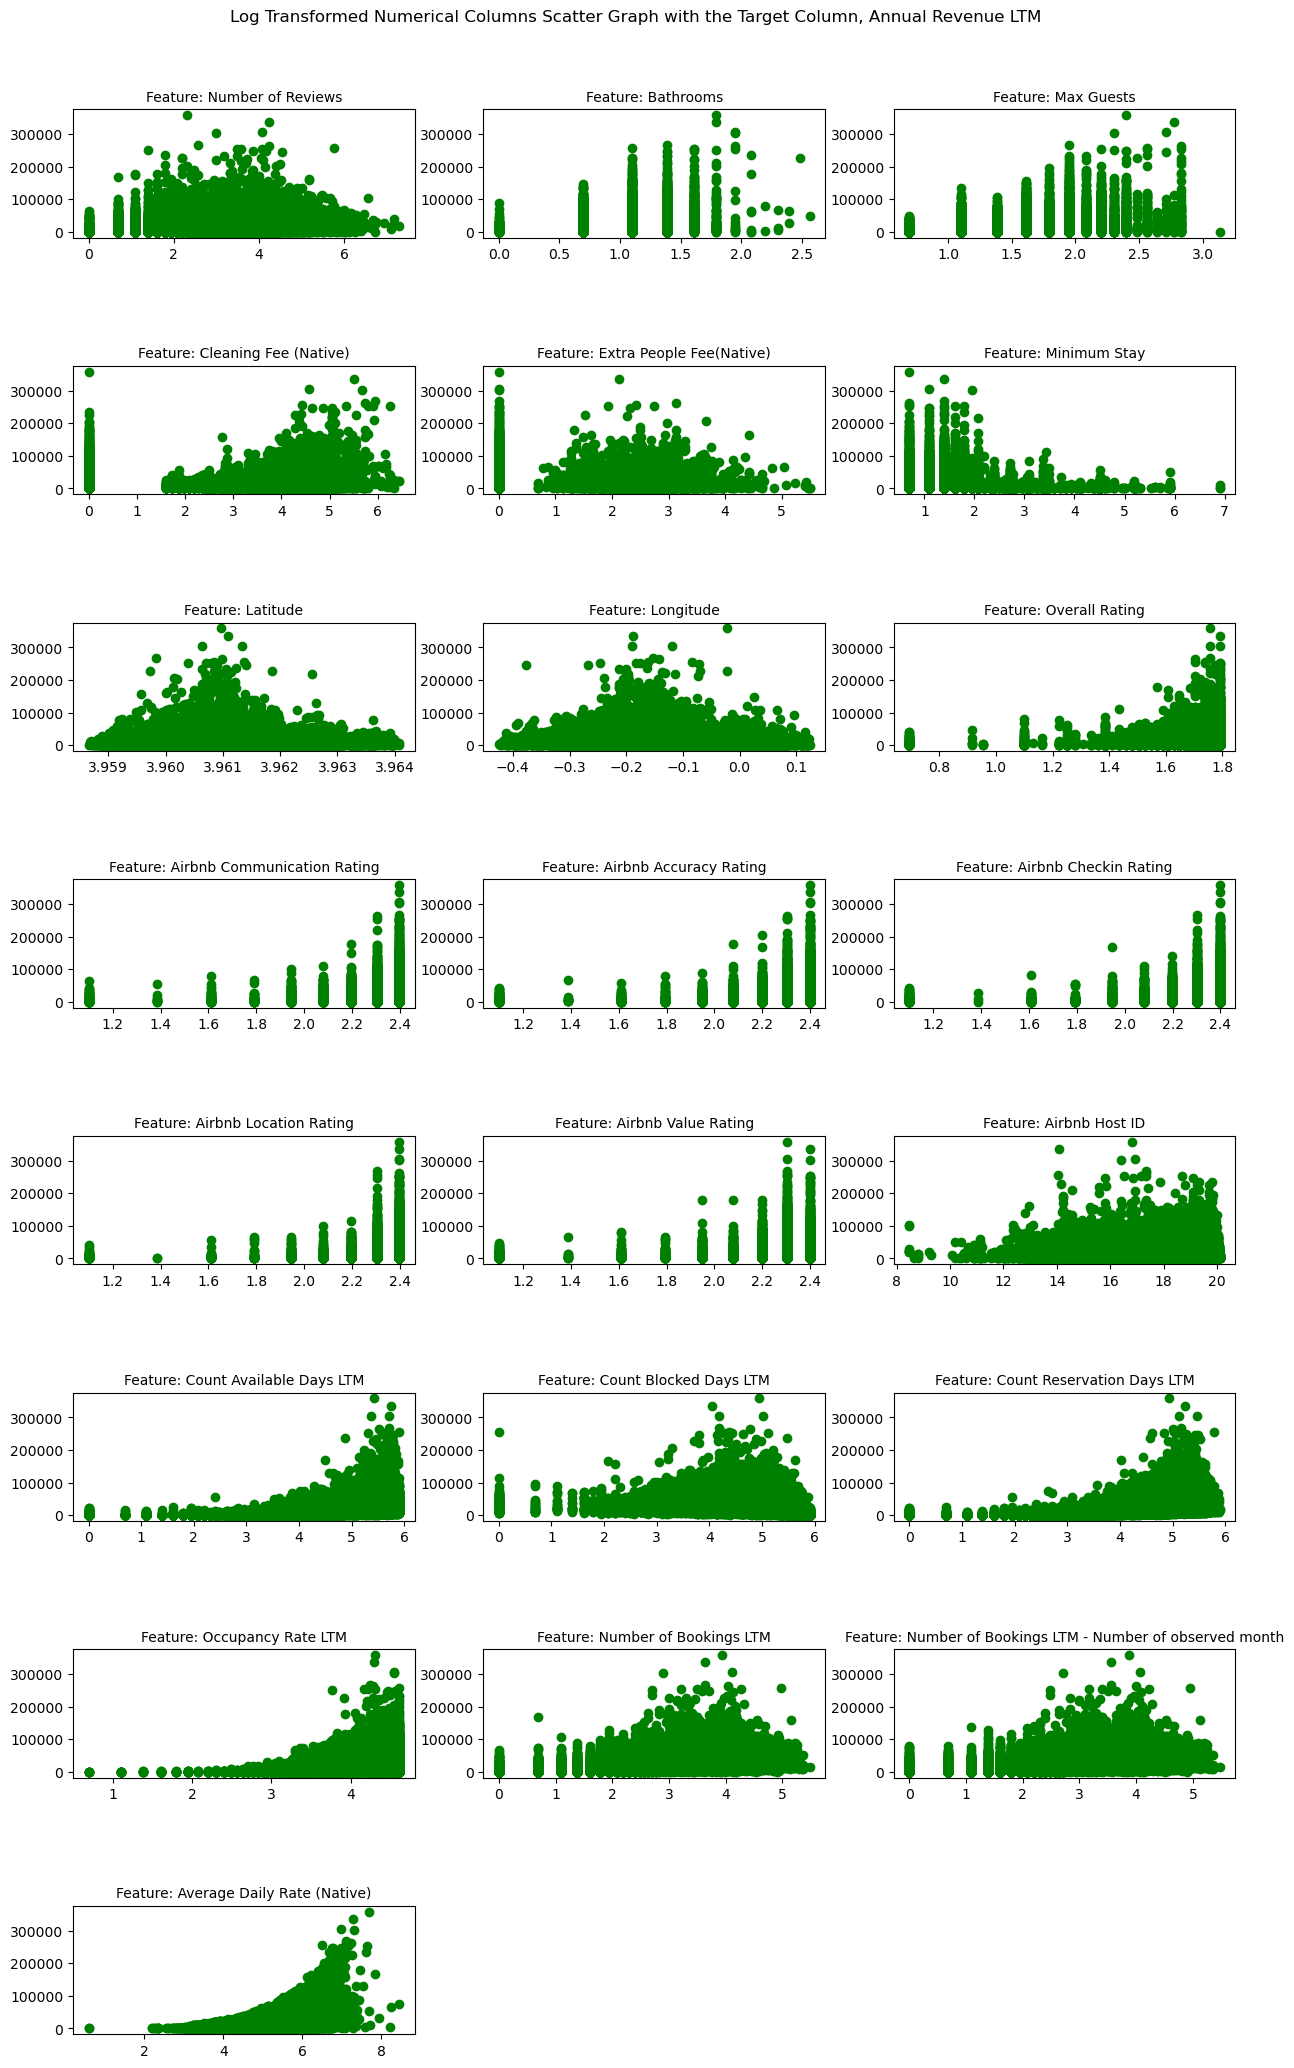

In [35]:
# create a subplots structure with 3 columns and 8 rows
cols = 3
rows = len(X_log.columns)//cols + 1

plt.figure(figsize=(15, 25))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Log Transformed Numerical Columns Scatter Graph with the Target Column, Annual Revenue LTM', y=0.92)

for i, column in enumerate(X_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.scatter(X_log[column], y, color='green')


plt.show()

The log transformed target column will be plotted against the log transformed independent variables:

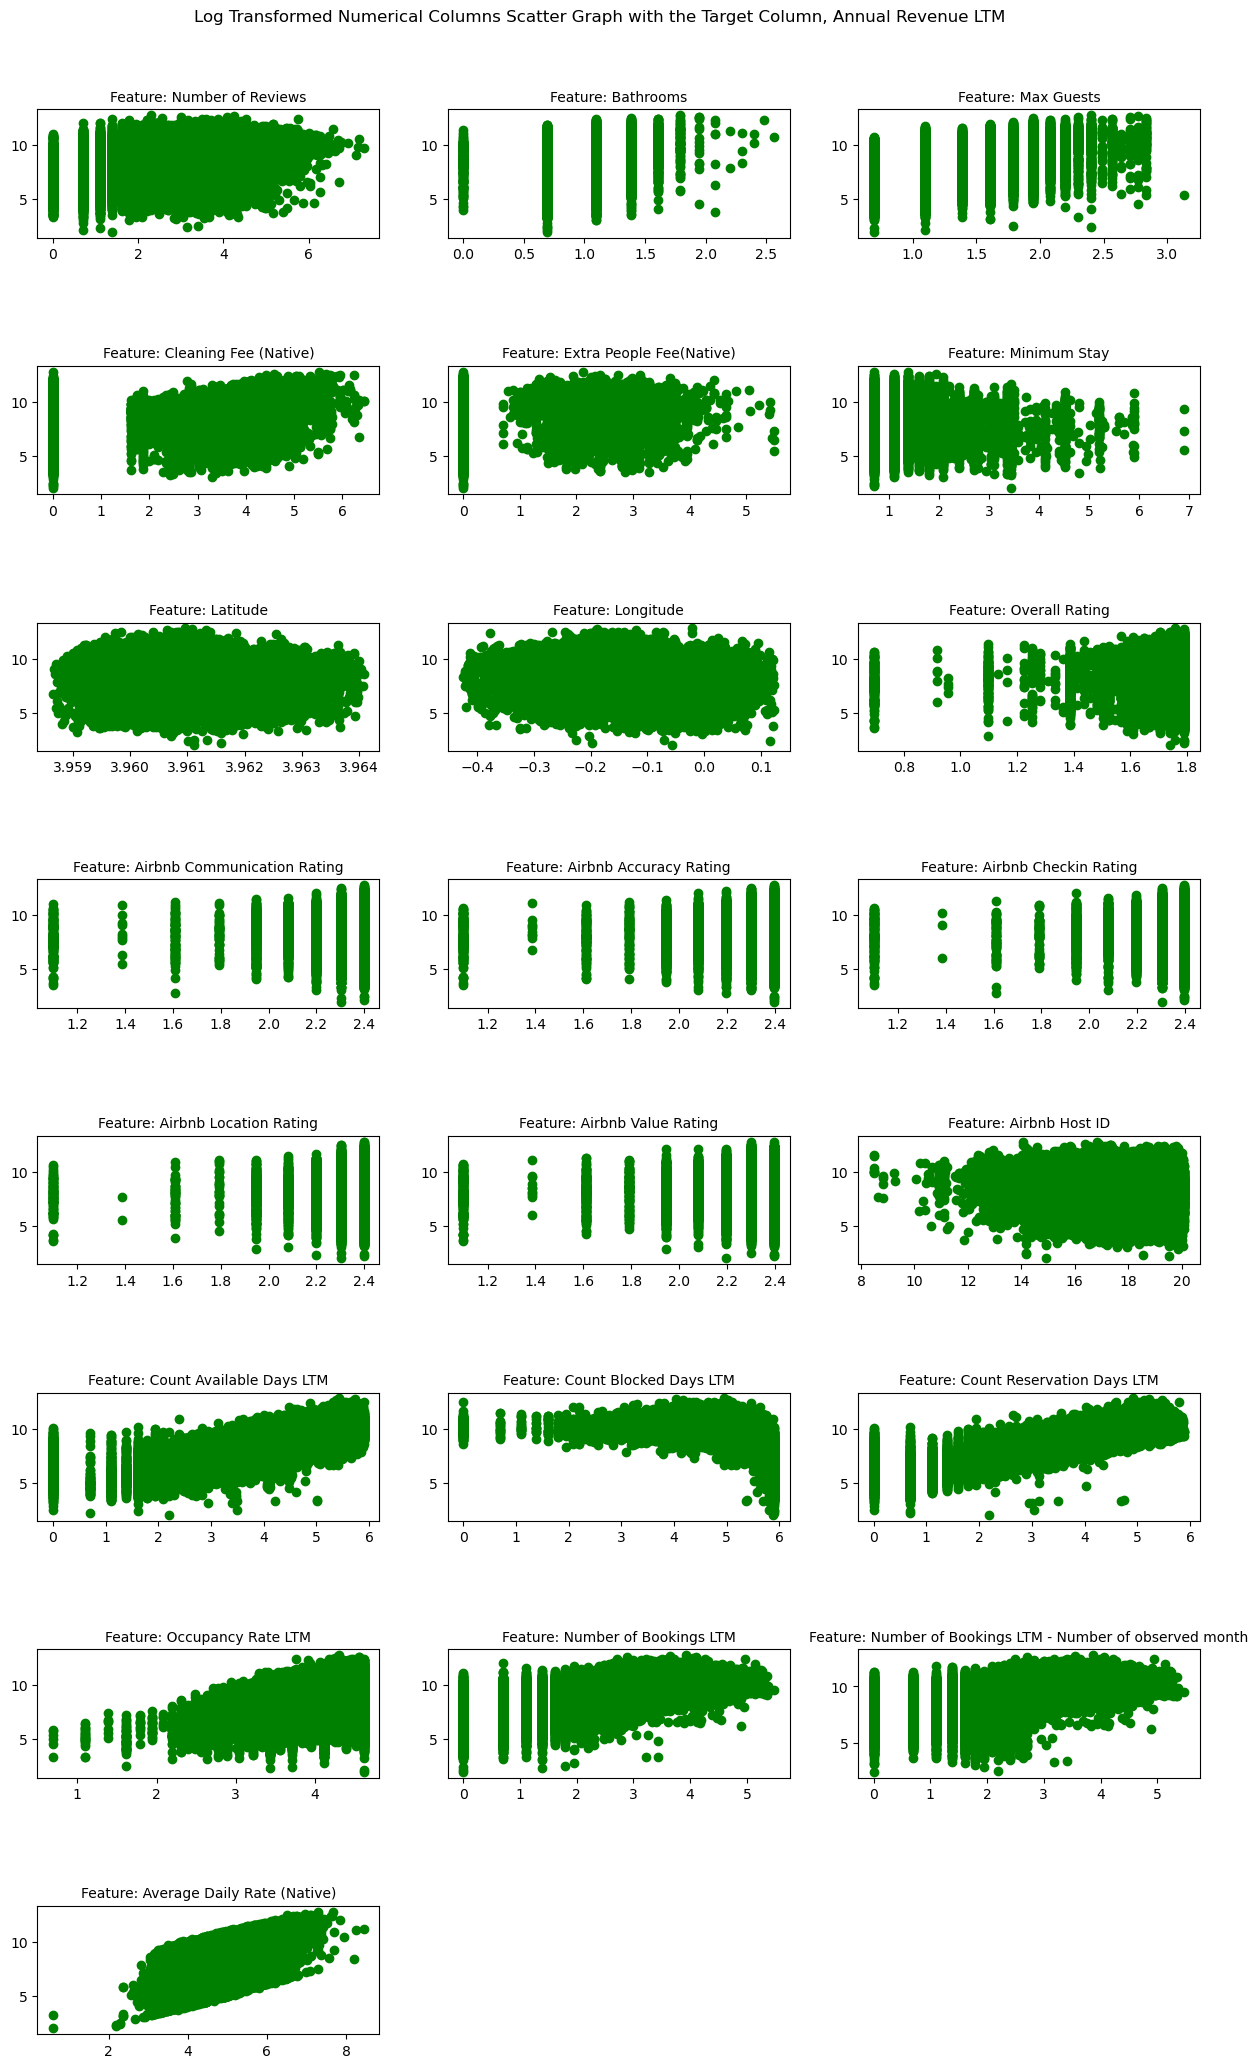

In [36]:
# create a subplots structure with 3 columns and 8 rows
cols = 3
rows = len(X_log.columns)//cols + 1

plt.figure(figsize=(15, 25))
plt.tight_layout()
plt.subplots_adjust(hspace = 1)
plt.suptitle('Log Transformed Numerical Columns Scatter Graph with the Target Column, Annual Revenue LTM', y=0.92)

for i, column in enumerate(X_log.columns):
    ax = plt.subplot(rows, cols, i+1)
    ax.set_title(f"Feature: {column}", size=10)
    ax.scatter(X_log[column], y_log, color='green')


plt.show()

Some correlation matrices will be made, to compare the correlations from the various independent variable transformations against the target column.

In [37]:
# Matrix to compare correlations for X against y
# Create correlation matrix
corr_matrix_y_x = X_num_cols.corrwith(y)

# Convert matrix to dataframe
x_y = corr_matrix_y_x.to_frame()

# rename header
x_y.rename(columns={'0': 'Correlation'}, inplace=True)

# View matrix
x_y

,0
Number of Reviews,0.167296
Bathrooms,0.268265
Max Guests,0.384749
Cleaning Fee (Native),0.313376
Extra People Fee(Native),0.057890
Minimum Stay,-0.057546
Latitude,-0.013083
Longitude,-0.081802
Overall Rating,0.060947
Airbnb Communication Rating,0.043607


In [38]:
# Matrix to compare correlations for X_log transformed against y
# Create correlation matrix
corr_matrix_y_xlog = X_log.corrwith(y)

# Convert matrix to dataframe
xlog_y = corr_matrix_y_xlog.to_frame()

# rename header
xlog_y.rename(columns={'0': 'Correlation'}, inplace=True)

# View matrix
xlog_y

,0
Number of Reviews,0.278550
Bathrooms,0.250259
Max Guests,0.374184
Cleaning Fee (Native),0.230232
Extra People Fee(Native),0.085031
Minimum Stay,-0.081953
Latitude,-0.012995
Longitude,-0.075161
Overall Rating,0.063593
Airbnb Communication Rating,0.045983


In [39]:
# Matrix to compare correlations for X_log transformed against y_log:
# Create correlation matrix
corr_matrix_ylog_xlog = X_log.corrwith(y_log)

# Convert matrix to dataframe
xlog_ylog = corr_matrix_ylog_xlog.to_frame()
 
# rename header
xlog_ylog.rename(columns={'0': 'Correlation'}, inplace=True)

# View matrix
xlog_ylog

,0
Number of Reviews,0.370464
Bathrooms,0.146925
Max Guests,0.321042
Cleaning Fee (Native),0.161230
Extra People Fee(Native),0.068323
Minimum Stay,-0.116512
Latitude,-0.032148
Longitude,-0.080497
Overall Rating,0.078201
Airbnb Communication Rating,0.067402


The correlations for the standard x values and the target variable and the log transformed x variables look fairly similar. Although, a particularly influencial column 'Average Daily Rate (Native), does have a slightly higher correlation for the standard x-values.

## Conclusion 

This initial EDA has given insight into the various different numerical columns distributions and their relationships with the target column, for both their standard and log-transformed values. 

Initial insights have been found, particularly focusing on the influence London postal regions have on different components of an Airbnb properties success; being occupancy rate and annual revenue. It has been initially determined that postcodes that refer to some western region of London are the more successful ones.

It has been determined that a properties rating is not a particulary useful metric in determining how successful the property is. The majority of properties fall within the same 4* rating range and hence, their variation in prices will be due to other factors. 

Many of the independent variables have substantial correlations with the target column, indicating future modelling will produce some adequate results.

The initial EDA, as well as the data cleaning, has been very beneficial in gainining an initial understanding of the various numerical and object columns. Futher processing and initial modelling will be conducted in the following workbooks, to elaborate on their factors further.